# TBS

## preparing

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import hddm
import numpy as np
import pickle
from patsy import dmatrices, dmatrix, demo_data
cm = 1/2.54

## loading data

In [2]:
data = hddm.load_csv('exp2_DDM.csv')
data.at[data['step_att'].isin(['4']),'step_att']=2
data.at[data['step_att'].isin(['5']),'step_att']=1
data = hddm.utils.flip_errors(data)
data.head(10)

,subj_idx,group_idx,turn_type,task_type,snr_type,trial_num,step_att,response,rt,step_unatnd
0,55,Larynx,Left iTBS,Tone,Clear,1,3,1,1.083317,1
1,55,Larynx,Left iTBS,Tone,Clear,2,2,1,0.744397,1
2,55,Larynx,Left iTBS,Tone,Clear,3,2,1,0.732525,1
3,55,Larynx,Left iTBS,Tone,Clear,4,1,1,0.800199,1
4,55,Larynx,Left iTBS,Tone,Clear,5,2,1,0.753649,1
5,55,Larynx,Left iTBS,Tone,Clear,6,2,1,0.544652,1
6,55,Larynx,Left iTBS,Tone,Clear,7,1,1,0.621313,1
7,55,Larynx,Left iTBS,Tone,Clear,8,1,1,0.580819,1
8,55,Larynx,Left iTBS,Tone,Clear,9,1,0,-0.496794,1
9,55,Larynx,Left iTBS,Tone,Clear,10,3,1,0.863869,1


## left stim, tone, clear

### preparing data

In [3]:
D_L=data.loc[data['turn_type'].isin(['Left cTBS','Sham'])]
D_L_T=D_L.loc[D_L['task_type']=='Tone']
D_L_T_N=D_L_T.loc[D_L_T['snr_type']=='Noise']
D_L_T_N.to_csv('Exp2_D_L_T_N_cTBS.csv')

### baseline model

In [4]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_bsl = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_bsl.find_starting_values()
D_L_T_N_bsl.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]


/home/bsliang/miniconda3/envs/bsliang_DDM_27/lib/python2.7/site-packages/scipy/optimize/optimize.py:1934: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 2001 of 2000 complete in 3810.4 sec

### model 1: a only

In [5]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_am = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_am.find_starting_values()
D_L_T_N_am.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4516.3 sec

### model 2: v only

In [6]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_vm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_vm.find_starting_values()
D_L_T_N_vm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4369.6 sec

### model 3: z only

In [7]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_zm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_zm.find_starting_values()
D_L_T_N_zm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4484.4 sec

### model 4: a + v

In [8]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_avm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_avm.find_starting_values()
D_L_T_N_avm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4824.2 sec

### model 5: a + z

In [9]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_azm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_azm.find_starting_values()
D_L_T_N_azm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5064.0 sec

### model 6: v + z

In [10]:
a_reg = {'model': "a ~ 1 + C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_vzm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_vzm.find_starting_values()
D_L_T_N_vzm.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_C(turn_type, Treatment('Sham'))[T.Left cTBS]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 4893.3 sec

### model 7: a + v + z

In [11]:
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
D_L_T_N_fm = hddm.HDDMRegressor(D_L_T_N, reg_descr, include='z')
D_L_T_N_fm.find_starting_values()
D_L_T_N_fm.sample(2000, burn=20, dbname='traces.db', db='pickle')
D_L_T_N_fm.save('D_L_T_N_fm')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5495.4 secWARNING: Will not save custom link functions.


### Model comparison

baseline model DIC: 6246.032156
a model DIC: 6244.481077
v model DIC: 6240.866572
z model DIC: 6249.121167
av model DIC: 6235.862521
az model DIC: 6243.123234
vz model DIC: 6228.132198
full model DIC: 6227.290344


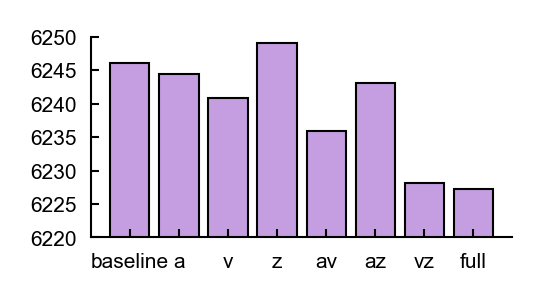

In [20]:
print("baseline model DIC: %f" % D_L_T_N_bsl.dic)
print("a model DIC: %f" % D_L_T_N_am.dic)
print("v model DIC: %f" % D_L_T_N_vm.dic)
print("z model DIC: %f" % D_L_T_N_zm.dic)
print("av model DIC: %f" % D_L_T_N_avm.dic)
print("az model DIC: %f" % D_L_T_N_azm.dic)
print("vz model DIC: %f" % D_L_T_N_vzm.dic)
print("full model DIC: %f" % D_L_T_N_fm.dic)

fig, ax = plt.subplots()

fruits = ['baseline', 'a', 'v', 'z', 'av', 'az', 'vz','full']
counts = [D_L_T_N_bsl.dic, D_L_T_N_am.dic, D_L_T_N_vm.dic, D_L_T_N_zm.dic,D_L_T_N_avm.dic,D_L_T_N_azm.dic,D_L_T_N_vzm.dic,D_L_T_N_fm.dic]

D_name='D_L_T_N'

ax.bar(fruits, counts,color=[197./255,158./255,226./255],edgecolor='black',linewidth=0.5)

plt.rcParams['savefig.dpi']=300
plt.rcParams['axes.linewidth']=0.5

#ax.set_ylabel('DIC value')
#ax.set_title('TBS: Left cTBS consonant quiet')
ax.set_ylim([6220,6250])
ytick_plot=range(6220,6250,5)
ytick_plot.append(6250)
ax.set_yticks(ytick_plot)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

fig.set_size_inches(4.6*cm,2.25*cm)
ax.tick_params('both',which='major',direction='in',width=0.5,length=2)
plt.rcParams['font.size']=5
plt.rcParams['font.family']='Arial'
plt.savefig(D_name+'_interact_M_compare.pdf',bbox_inches = 'tight',transparent=True)
plt.show()

### Plotting

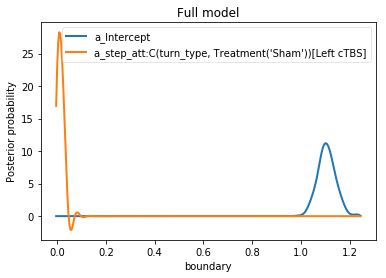

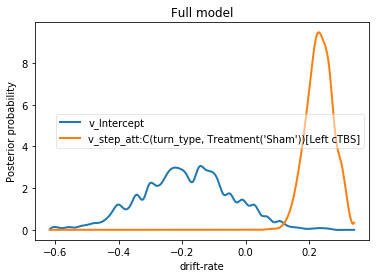

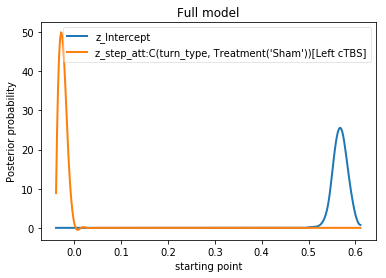

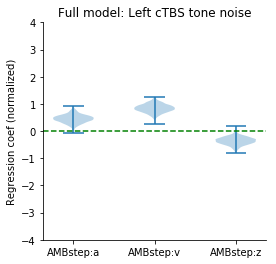

('P(a > Sham) = ', 0.996969696969697)
('P(v > Sham) = ', 1.0)
('P(z > Sham) = ', 0.010606060606060607)


In [13]:
a_Intercept,a_cTBS = D_L_T_N_fm.nodes_db.loc[["a_Intercept","a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([a_Intercept,a_cTBS])
plt.xlabel('boundary')
plt.ylabel('Posterior probability')
plt.title('Full model')

v_Intercept,v_cTBS = D_L_T_N_fm.nodes_db.loc[["v_Intercept","v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([v_Intercept,v_cTBS])
plt.xlabel('drift-rate')
plt.ylabel('Posterior probability')
plt.title('Full model')

z_Intercept,z_cTBS = D_L_T_N_fm.nodes_db.loc[["z_Intercept","z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]"], 'node']
hddm.analyze.plot_posterior_nodes([z_Intercept,z_cTBS])
plt.xlabel('starting point')
plt.ylabel('Posterior probability')
plt.title('Full model')


fig, ax = plt.subplots()
fig.set_size_inches(4,4)

para_tag=['AMBstep:a','AMBstep:v','AMBstep:z']
counts = [a_cTBS.trace()/(max(a_cTBS.trace())-min(a_cTBS.trace())),v_cTBS.trace()/(max(v_cTBS.trace())-min(v_cTBS.trace())),z_cTBS.trace()/(max(z_cTBS.trace())-min(z_cTBS.trace()))]

ax.axhline(y = 0, color ="green", linestyle ="--")
ax.violinplot(counts)
ax.set_xticks([1,2,3])
ax.set_xticklabels(para_tag)
ax.set_ylim([-4,4])
ax.set_title('Full model: Left cTBS tone noise')
ax.set_ylabel('Regression coef (normalized)')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.show()

print("P(a > Sham) = ", (a_cTBS.trace() > 0).mean())
print("P(v > Sham) = ", (v_cTBS.trace() > 0).mean())
print("P(z > Sham) = ", (z_cTBS.trace() > 0).mean())

### check full model simulation prediction accuracy

#### fit the full model

In [14]:
fm_data_2=D_L_T_N
fm_data_2.reset_index(inplace = True, drop = True)
a_reg = {'model': "a ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
v_reg = {'model': "v ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
z_reg = {'model': "z ~ 1 + step_att:C(turn_type, Treatment('Sham'))",'link_func': lambda x: x}
reg_descr = [a_reg,v_reg,z_reg]
fm_2 = hddm.HDDMRegressor(fm_data_2, reg_descr, include='z')
fm_2.find_starting_values()
fm_2.sample(2000, burn=20, dbname='traces.db', db='pickle')

Adding these covariates:
['a_Intercept', "a_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "a_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['v_Intercept', "v_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "v_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
Adding these covariates:
['z_Intercept', "z_step_att:C(turn_type, Treatment('Sham'))[Left cTBS]", "z_step_att:C(turn_type, Treatment('Sham'))[Sham]"]
 [-----------------100%-----------------] 2001 of 2000 complete in 5516.4 sec

#### predict data from simulated data derived from full model

In [15]:
fm_data_2_sim = hddm.utils.post_pred_gen(fm_2)
hddm.utils.post_pred_stats(fm_data_2, fm_data_2_sim)

 [-------------------112%-------------------] 28 of 25 complete in 24374.8 sec

,observed,mean,std,SEM,MSE,credible,quantile,mahalanobis
stat,,,,,,,,
accuracy,0.576923,0.579191,0.135996,0.000005,0.018500,True,50.056000,0.016677
mean_ub,0.747240,0.766788,0.151045,0.000382,0.023197,True,55.040001,0.129422
std_ub,0.273763,0.252401,0.069978,0.000456,0.005353,True,66.863998,0.305269
10q_ub,0.483289,0.540312,0.118634,0.003252,0.017326,True,25.327999,0.480662
30q_ub,0.603073,0.606718,0.127618,0.000013,0.016300,True,56.680000,0.028562
50q_ub,0.697525,0.690324,0.140541,0.000052,0.019804,True,58.896000,0.051234
70q_ub,0.804018,0.818042,0.162488,0.000197,0.026599,True,57.112000,0.086311
90q_ub,1.073881,1.092994,0.221193,0.000365,0.049292,True,55.992001,0.086411
mean_lb,-0.772920,-0.787177,0.147985,0.000203,0.022103,True,42.824001,0.096340
